<br/>
<span style="font-size:xx-large;font-weight:bold;">
City of Tucson's Climate Action and Adaptation Plan Community Survey
</span>
<br/>

**Preguntas abiertas:**

Do you have other climate mitigation ideas? Submit here:

Do you have other climate adaptation ideas? Submit here:

Do you have other ideas for environmental equity, justice, and community resilience? Submit here:

Do you have other policy ideas? Submit here:

Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:

Is there anything else you would like to share that was not already addressed?

**Paquetes especiales:**

```
conda install -c conda-forge pyjwt=1.7.1
```

# Utilidades

In [1]:
# Esta celda contiene funciones de utilidad para la preparación de los datos para el
# análisis de texto.

import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Descarga los elementos de NLTK necesarios.
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

def get_unwanted_words():
    """
    Genera la lista de palabras irrelevantes para el análisis de sentimientos y que 
    por tanto se ignorarán. Entre estos tipos de palabras se encuentran artículos, 
    pronombres, preposiciones, conjunciones y palabras definidas por nosotros mismos.
    """
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    unwanted.extend(['tucson', 'city', 'people'])
    return unwanted


def get_column_clean_copy(dataframe, column_name):
    """
    Copia y limpia los valores de una columna en un dataframe nuevo.
    """
    df_copy = dataframe[[column_name]].copy()
    df_copy = df_copy.replace(r'\n', ' ', regex=True) 
    df_copy = df_copy.replace(r'^\s*no\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*NO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*No\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*nO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*-\s*$', '', regex=True)
    nan_value = float("NaN")
    df_copy.replace('', nan_value, inplace=True)
    df_copy = df_copy.dropna()
    return df_copy


def filter_words_array(words, unwanted_words):
    """
    Filtra una lista de palabras de acuerdo a una lista establecida y otros
    parámetros utilizados para dejar solamente palabras útiles para el
    análisis de texto.
    """
    # Elimina palabras no deseadas.
    words = [w.lower() for w in words if w.lower() not in unwanted_words]
    # Elimina tokens no alfabéticos.
    words = [w.lower() for w in words if w.isalpha()]
    return words


def create_word_cloud(words, title=None):
    """
    Genera una wordcloud a partir de una lista de palabras.
    Esta función no realiza filtros de unwanted words, las
    palabras que se manden ya deben estar filtradas.
    """
    if len(words) == 0:
        words = ['NONE']
        
    # Concatena los tokens para formar una sola cadena
    text = ', '.join([word for word in words])

    # Configura la wordcloud
    wordcloud = WordCloud(width=1500, height=500,
                          background_color='white',
                          min_font_size=10).generate(text)

    # Muestra la wordcloud
    plt.figure(figsize=(15, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    if title is not None:
        plt.title(title, fontdict={
                  'family': 'sans', 'color': 'black', 'size': 50}, pad=20)
    plt.show()
    return wordcloud


def most_frequent(items):
    occurence_count = Counter(items)
    return occurence_count.most_common(1)[0][0]

[nltk_data] Downloading package names to /home/porfirio/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/porfirio/nlt

In [2]:
unwanted_words = get_unwanted_words()

# Algoritmos

## Algoritmo VADER

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(str(text))['compound']

## Algoritmo Textblob

In [4]:
from textblob import TextBlob

def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

## Algoritmo IBM Watson

In [5]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions


def get_ibmwatson_score(text):
    # Inicializa autenticador para la API de IBM.
    authenticator = IAMAuthenticator(
        'Keolj04gR6No5O3s36YIuYpSrHO1qbwHBVF2koYAdlKn'
    )

    # Inicializa el analizador.
    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2020-08-01',
        authenticator=authenticator,
    )

    # Establece la URL del analizador.
    natural_language_understanding.set_service_url(
        'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/ad75e4da-163f-4ebc-aedd-9324258d41c7'
    )
    
    # Realiza el análisis
    response = natural_language_understanding.analyze (
        text = text,
        features = Features(sentiment=SentimentOptions()),
        language = 'en'
    ).get_result()
    
    # Extrae el score del resultado del análisis
    res = response.get('sentiment').get('document').get('score')
    return res

## Algoritmo Naive Bayes Textblob

In [6]:
from textblob.sentiments import NaiveBayesAnalyzer


def get_textblob_nb_score(text):
    return TextBlob(text, analyzer=NaiveBayesAnalyzer()).polarity

## Obtención de scores y polaridades

In [7]:
def get_sentiment_scores(dataframe, column):
    """
    Obtiene los scores de análisis de sentimientos para los valores de la
    columna de un dataframe.
    
    Los algorimos usados son:
    - Vader
    - Textblob
    - IBM Watson
    - Naive Bayes
    """
    
    classified_data = []
    index = 1
    totales = len(dataframe[column])
    
    for text in dataframe[column]:
        text_str = str(text)
        
        scores = [
            get_vader_score(text_str),
            get_textblob_score(text_str),
            get_ibmwatson_score(text_str),
            get_textblob_nb_score(text_str),
        ]
        
        classified_data.append([
            scores[0],
            scores[1],
            scores[2],
            scores[3]
        ])
        
        print(f'Clasificación {index} de {totales}')
        index += 1
        
    return classified_data

In [8]:
def get_polaridades(score_groups, neutral_mode='neutral'):
    """
    Obtiene la polaridad del score de sentimientos de un 
    conjunto de datos.
    """
    
    polaridades = []

    for i in range(len(score_groups)):
        polaridades.append([])
        
        for j in range(4): 
            polaridades[i].append(score_groups[i][j])
            
            if polaridades[i][j] > 0.15:
                polaridades[i][j] = 1
            elif polaridades[i][j] < -0.15:
                polaridades[i][j] = -1
            else:
                if neutral_mode == 'neutral':
                    polaridades[i][j] = 0
                elif neutral_mode == 'positive_to_neutral':
                    polaridades[i][j] = 1
                elif neutral_mode == 'negative_to_neutral':
                    polaridades[i][j] = -1

    return polaridades

In [9]:
def create_classified_dataframe(dataframe, scores, neutral_mode='neutral'):
    """
    Crea un dataframe con los resultados de la clasificación de sentimientos.
    """
    
    polaridades = get_polaridades(scores, neutral_mode)
    classified_df = pd.DataFrame(polaridades, columns=['Vader', 'Textblob', 'Watson', 'Naive'])
    classified_df['Answer'] = dataframe['Answer'].tolist()
    max_votings = []
    
    for group in polaridades:
        max_votings.append(most_frequent(group))
    
    classified_df['MaxVoting'] = max_votings
    classified_df['Sentiment'] = dataframe['Sentiment'].tolist()
    columns = ['Answer', 'Vader', 'Textblob', 'Watson', 'Naive', 'MaxVoting', 'Sentiment']
    classified_df = classified_df[columns]
    return classified_df

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics


def plot_confussion_matrix(dataframe, y_actual, y_pred):
    # Genera la matriz de confusión
    confussion_matrix = pd.crosstab(
        classified_df2[y_actual],
        classified_df2[y_pred],
        rownames=[y_actual],
        colnames=[y_pred],
        normalize='index'
    ).round(4) * 100

    # Muestra heatmap de la matriz de confusión
    sn.heatmap(confussion_matrix, annot=True, cmap='Blues')
    plt.show()
    
    return confussion_matrix

    
def show_confussion_matrix_metrics(dataframe, y_actual, y_pred):
    # Printing the precision and recall, among other metrics
    print(metrics.classification_report(dataframe[y_actual], dataframe[y_pred], labels=[-1, 0, 1]))

In [11]:
from sklearn.metrics import cohen_kappa_score

def kappa(dataframe, y_actual, y_pred):
    return cohen_kappa_score(dataframe[y_actual], dataframe[y_pred])

In [12]:
def show_classifier_results(classifier, dataframe, y_actual):
    print(f'CLASIFICACIONES {classifier.upper()}')
    prediction = get_num_clasificaciones(dataframe, classifier)
    print('\nMATRIZ DE CONFUSIÓN')
    confussion_matrix = plot_confussion_matrix(dataframe, y_actual, classifier)
    
    print('METRICS')
    show_confussion_matrix_metrics(classified_df2, y_actual, classifier)
    
    print('KAPPA')
    kappa_coef = kappa(dataframe, y_actual, classifier)
    print(kappa_coef)

In [13]:
def get_num_clasificaciones(dataframe, algoritmo):
    pred_positivas = 0
    pred_negativas = 0
    pred_neutrales = 0

    for sentimiento in dataframe[algoritmo]:
        if sentimiento == 1:
            pred_positivas += 1
        elif sentimiento == 0:
            pred_neutrales += 1
        elif sentimiento == -1:
            pred_negativas += 1

    print(f'{algoritmo} positivas: {pred_positivas}')
    print(f'{algoritmo} negativas: {pred_negativas}')
    print(f'{algoritmo} neutrales: {pred_neutrales}')
    
    return [pred_positivas, pred_negativas, pred_neutrales]

# Muestras de respuestas originales

## Lectura del dataset

## Análisis de sentimientos

# Muestras de respuestas con separaciones

## Lectura del dataset

In [14]:
import pandas as pd

df2 = pd.read_csv(r'utf8/sample-tucson-separado.csv', encoding='latin-1')

In [15]:
df2.head(10)

,Answer,Question,Sentiment
0,Planting shade trees along city walks to reduc...,1,Positive
1,Changing roads from black asphalt to something...,1,Positive
2,Tucson for the most part is not walkable. What...,1,Negative
3,"Tree planting, green space, restrict new devel...",1,Positive
4,"Truly, it seems that vehicle pollution in Tucs...",1,Negative
5,Encouraging and promoting alternative forms of...,1,Positive
6,More walkable spaces. Completely close some st...,1,Positive
7,Support green job industries and training prog...,1,Positive
8,Insulation Community or city large scale solar...,1,Positive
9,Water efficiency programs to save on energy em...,1,Positive


## Análisis de sentimientos

In [16]:
sentiment_scores = get_sentiment_scores(df2, 'Answer')

Clasificación 1 de 95
Clasificación 2 de 95
Clasificación 3 de 95
Clasificación 4 de 95
Clasificación 5 de 95
Clasificación 6 de 95
Clasificación 7 de 95
Clasificación 8 de 95
Clasificación 9 de 95
Clasificación 10 de 95
Clasificación 11 de 95
Clasificación 12 de 95
Clasificación 13 de 95
Clasificación 14 de 95
Clasificación 15 de 95
Clasificación 16 de 95
Clasificación 17 de 95
Clasificación 18 de 95
Clasificación 19 de 95
Clasificación 20 de 95
Clasificación 21 de 95
Clasificación 22 de 95
Clasificación 23 de 95
Clasificación 24 de 95
Clasificación 25 de 95
Clasificación 26 de 95
Clasificación 27 de 95
Clasificación 28 de 95
Clasificación 29 de 95
Clasificación 30 de 95
Clasificación 31 de 95
Clasificación 32 de 95
Clasificación 33 de 95
Clasificación 34 de 95
Clasificación 35 de 95
Clasificación 36 de 95
Clasificación 37 de 95
Clasificación 38 de 95
Clasificación 39 de 95
Clasificación 40 de 95
Clasificación 41 de 95
Clasificación 42 de 95
Clasificación 43 de 95
Clasificación 44 de 

In [17]:
# Crea una copia del dataframe y reemplaza los datos categóricos del sentimiento por numéricos.
df2t = df2.copy()
df2t['Sentiment'] = df2t['Sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1})

## Resultados

**Verdadero positivo:** Predijo positivo y es verdad.

**Verdadero negativo:** Predijo negativo y es verdad.

**Falso positivo:** Predijo positivo pero es falso.

**Falso negativo:** Predijo negativo pero es falso.
___

**Precision:** Número de elementos identificados correctamente como positivos de un total de elementos identificados como positivos.

**Recall:** Número de elementos identificados correctamente como positivos del total de positivos verdaderos.

**F1:** Combina precision y recall.

**Accuracy:** Mide el porcentaje de elementos clasificados correctamente. Esta métrica presenta problemas si las clases no están balanceadas. Por ejemplo, se tienen 10 gatos y 90 perros, entonces, si se predice perro para cada objeto, la accuracy sería del 90%, pero esto debido a que el modelo siempre predice perro sin importar la entrada.

**Kappa:** Medida estadística que ajusta el efecto del azar en la proporción de la concordancia observada para elementos cualitativos (variables categóricas). En general se cree que es una medida más robusta que el simple cálculo del porcentaje de concordancia, ya que k tiene en cuenta el acuerdo que ocurre por azar.

< 0 No agreement

0 - .20 Slight

.21 - .40 Fair

.41 - .60 Moderate

.61 - .80 Substantial

.81 - 1.0 Perfect

 ### Consideración de tres polaridades (positivo, negativo y neutral)

In [18]:
classified_df2 = create_classified_dataframe(df2t, sentiment_scores, neutral_mode='neutral')

In [19]:
real_sentiment = get_num_clasificaciones(classified_df2, 'Sentiment')

Sentiment positivas: 58
Sentiment negativas: 30
Sentiment neutrales: 7


CLASIFICACIONES VADER
Vader positivas: 50
Vader negativas: 19
Vader neutrales: 26

MATRIZ DE CONFUSIÓN


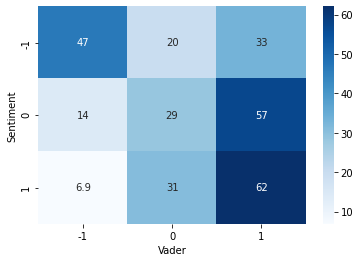

METRICS
              precision    recall  f1-score   support

          -1       0.74      0.47      0.57        30
           0       0.08      0.29      0.12         7
           1       0.72      0.62      0.67        58

    accuracy                           0.55        95
   macro avg       0.51      0.46      0.45        95
weighted avg       0.68      0.55      0.60        95

KAPPA
0.23971710403871205


In [20]:
show_classifier_results('Vader', classified_df2, 'Sentiment')

CLASIFICACIONES TEXTBLOB
Textblob positivas: 32
Textblob negativas: 14
Textblob neutrales: 49

MATRIZ DE CONFUSIÓN


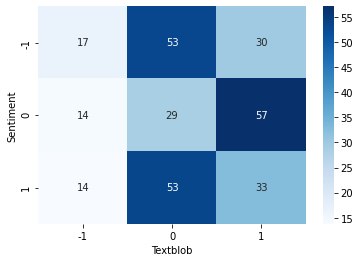

METRICS
              precision    recall  f1-score   support

          -1       0.36      0.17      0.23        30
           0       0.04      0.29      0.07         7
           1       0.59      0.33      0.42        58

    accuracy                           0.27        95
   macro avg       0.33      0.26      0.24        95
weighted avg       0.48      0.27      0.33        95

KAPPA
-0.02325944427099591


In [21]:
show_classifier_results('Textblob', classified_df2, 'Sentiment')

CLASIFICACIONES WATSON
Watson positivas: 36
Watson negativas: 36
Watson neutrales: 23

MATRIZ DE CONFUSIÓN


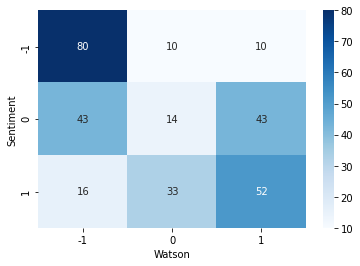

METRICS
              precision    recall  f1-score   support

          -1       0.67      0.80      0.73        30
           0       0.04      0.14      0.07         7
           1       0.83      0.52      0.64        58

    accuracy                           0.58        95
   macro avg       0.51      0.49      0.48        95
weighted avg       0.72      0.58      0.62        95

KAPPA
0.3328651685393259


In [22]:
show_classifier_results('Watson', classified_df2, 'Sentiment')

CLASIFICACIONES NAIVE
Naive positivas: 32
Naive negativas: 14
Naive neutrales: 49

MATRIZ DE CONFUSIÓN


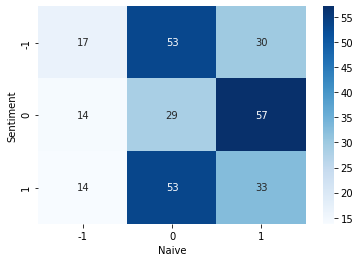

METRICS
              precision    recall  f1-score   support

          -1       0.36      0.17      0.23        30
           0       0.04      0.29      0.07         7
           1       0.59      0.33      0.42        58

    accuracy                           0.27        95
   macro avg       0.33      0.26      0.24        95
weighted avg       0.48      0.27      0.33        95

KAPPA
-0.02325944427099591


In [23]:
show_classifier_results('Naive', classified_df2, 'Sentiment')

CLASIFICACIONES MAXVOTING
MaxVoting positivas: 42
MaxVoting negativas: 20
MaxVoting neutrales: 33

MATRIZ DE CONFUSIÓN


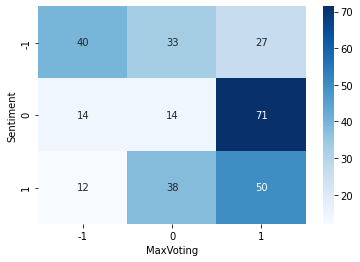

METRICS
              precision    recall  f1-score   support

          -1       0.60      0.40      0.48        30
           0       0.03      0.14      0.05         7
           1       0.69      0.50      0.58        58

    accuracy                           0.44        95
   macro avg       0.44      0.35      0.37        95
weighted avg       0.61      0.44      0.51        95

KAPPA
0.1255644320944772


In [24]:
show_classifier_results('MaxVoting', classified_df2, 'Sentiment')

 ### Transformación con 2 polaridades (neutral a negativo)

In [25]:
classified_df2 = create_classified_dataframe(df2t, sentiment_scores, 'negative_to_neutral')
classified_df2['Sentiment'] = classified_df2['Sentiment'].replace({0: -1})

In [26]:
real_sentiment = get_num_clasificaciones(classified_df2, 'Sentiment')

Sentiment positivas: 58
Sentiment negativas: 37
Sentiment neutrales: 0


CLASIFICACIONES VADER
Vader positivas: 50
Vader negativas: 45
Vader neutrales: 0

MATRIZ DE CONFUSIÓN


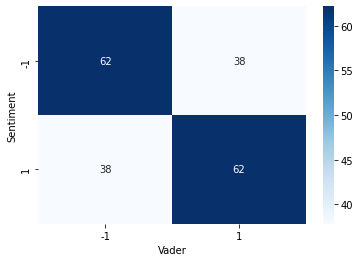

METRICS
              precision    recall  f1-score   support

          -1       0.51      0.62      0.56        37
           0       0.00      0.00      0.00         0
           1       0.72      0.62      0.67        58

   micro avg       0.62      0.62      0.62        95
   macro avg       0.41      0.41      0.41        95
weighted avg       0.64      0.62      0.63        95

KAPPA
0.23318385650224216


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
show_classifier_results('Vader', classified_df2, 'Sentiment')

CLASIFICACIONES TEXTBLOB
Textblob positivas: 32
Textblob negativas: 63
Textblob neutrales: 0

MATRIZ DE CONFUSIÓN


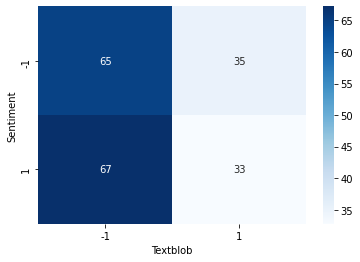

METRICS
              precision    recall  f1-score   support

          -1       0.38      0.65      0.48        37
           0       0.00      0.00      0.00         0
           1       0.59      0.33      0.42        58

   micro avg       0.45      0.45      0.45        95
   macro avg       0.32      0.33      0.30        95
weighted avg       0.51      0.45      0.44        95

KAPPA
-0.02108309218685389


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
show_classifier_results('Textblob', classified_df2, 'Sentiment')

CLASIFICACIONES WATSON
Watson positivas: 36
Watson negativas: 59
Watson neutrales: 0

MATRIZ DE CONFUSIÓN


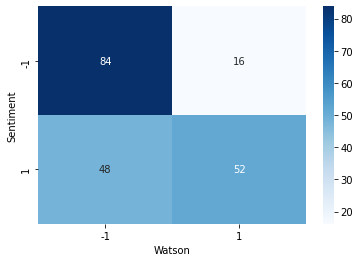

METRICS
              precision    recall  f1-score   support

          -1       0.53      0.84      0.65        37
           0       0.00      0.00      0.00         0
           1       0.83      0.52      0.64        58

   micro avg       0.64      0.64      0.64        95
   macro avg       0.45      0.45      0.43        95
weighted avg       0.71      0.64      0.64        95

KAPPA
0.3205721497686159


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
show_classifier_results('Watson', classified_df2, 'Sentiment')

CLASIFICACIONES NAIVE
Naive positivas: 32
Naive negativas: 63
Naive neutrales: 0

MATRIZ DE CONFUSIÓN


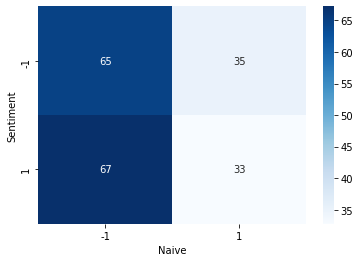

METRICS
              precision    recall  f1-score   support

          -1       0.38      0.65      0.48        37
           0       0.00      0.00      0.00         0
           1       0.59      0.33      0.42        58

   micro avg       0.45      0.45      0.45        95
   macro avg       0.32      0.33      0.30        95
weighted avg       0.51      0.45      0.44        95

KAPPA
-0.02108309218685389


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
show_classifier_results('Naive', classified_df2, 'Sentiment')

CLASIFICACIONES MAXVOTING
MaxVoting positivas: 40
MaxVoting negativas: 55
MaxVoting neutrales: 0

MATRIZ DE CONFUSIÓN


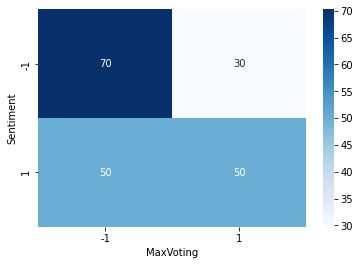

METRICS
              precision    recall  f1-score   support

          -1       0.47      0.70      0.57        37
           0       0.00      0.00      0.00         0
           1       0.72      0.50      0.59        58

   micro avg       0.58      0.58      0.58        95
   macro avg       0.40      0.40      0.39        95
weighted avg       0.63      0.58      0.58        95

KAPPA
0.1862955032119915


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
show_classifier_results('MaxVoting', classified_df2, 'Sentiment')

 ### Transformación con 2 polaridades (neutral a positivo)

In [32]:
classified_df2 = create_classified_dataframe(df2t, sentiment_scores, 'positive_to_neutral')
classified_df2['Sentiment'] = classified_df2['Sentiment'].replace({0: 1})

In [33]:
real_sentiment = get_num_clasificaciones(classified_df2, 'Sentiment')

Sentiment positivas: 65
Sentiment negativas: 30
Sentiment neutrales: 0


CLASIFICACIONES VADER
Vader positivas: 76
Vader negativas: 19
Vader neutrales: 0

MATRIZ DE CONFUSIÓN


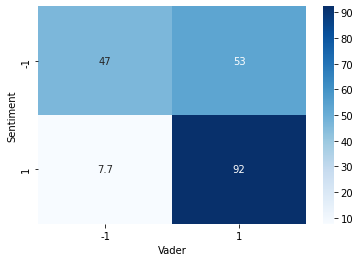

METRICS
              precision    recall  f1-score   support

          -1       0.74      0.47      0.57        30
           0       0.00      0.00      0.00         0
           1       0.79      0.92      0.85        65

   micro avg       0.78      0.78      0.78        95
   macro avg       0.51      0.46      0.47        95
weighted avg       0.77      0.78      0.76        95

KAPPA
0.43243243243243246


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
show_classifier_results('Vader', classified_df2, 'Sentiment')

CLASIFICACIONES TEXTBLOB
Textblob positivas: 81
Textblob negativas: 14
Textblob neutrales: 0

MATRIZ DE CONFUSIÓN


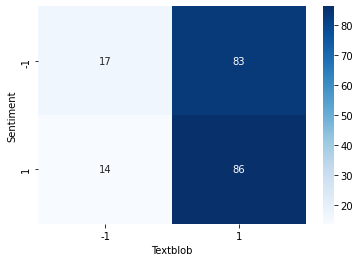

METRICS
              precision    recall  f1-score   support

          -1       0.36      0.17      0.23        30
           0       0.00      0.00      0.00         0
           1       0.69      0.86      0.77        65

   micro avg       0.64      0.64      0.64        95
   macro avg       0.35      0.34      0.33        95
weighted avg       0.59      0.64      0.60        95

KAPPA
0.03293413173652693


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
show_classifier_results('Textblob', classified_df2, 'Sentiment')

CLASIFICACIONES WATSON
Watson positivas: 59
Watson negativas: 36
Watson neutrales: 0

MATRIZ DE CONFUSIÓN


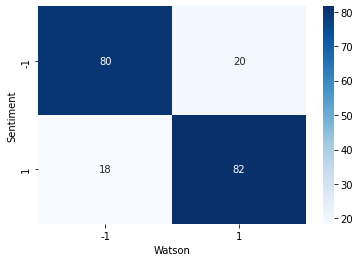

METRICS
              precision    recall  f1-score   support

          -1       0.67      0.80      0.73        30
           0       0.00      0.00      0.00         0
           1       0.90      0.82      0.85        65

   micro avg       0.81      0.81      0.81        95
   macro avg       0.52      0.54      0.53        95
weighted avg       0.83      0.81      0.81        95

KAPPA
0.583941605839416


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
show_classifier_results('Watson', classified_df2, 'Sentiment')

CLASIFICACIONES NAIVE
Naive positivas: 81
Naive negativas: 14
Naive neutrales: 0

MATRIZ DE CONFUSIÓN


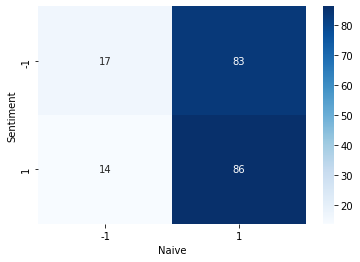

METRICS
              precision    recall  f1-score   support

          -1       0.36      0.17      0.23        30
           0       0.00      0.00      0.00         0
           1       0.69      0.86      0.77        65

   micro avg       0.64      0.64      0.64        95
   macro avg       0.35      0.34      0.33        95
weighted avg       0.59      0.64      0.60        95

KAPPA
0.03293413173652693


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
show_classifier_results('Naive', classified_df2, 'Sentiment')

CLASIFICACIONES MAXVOTING
MaxVoting positivas: 78
MaxVoting negativas: 17
MaxVoting neutrales: 0

MATRIZ DE CONFUSIÓN


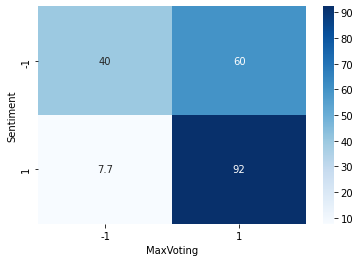

METRICS
              precision    recall  f1-score   support

          -1       0.71      0.40      0.51        30
           0       0.00      0.00      0.00         0
           1       0.77      0.92      0.84        65

   micro avg       0.76      0.76      0.76        95
   macro avg       0.49      0.44      0.45        95
weighted avg       0.75      0.76      0.74        95

KAPPA
0.3657474600870827


/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/porfirio/anaconda3/envs/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
show_classifier_results('MaxVoting', classified_df2, 'Sentiment')